<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_CNN_B_five_layers_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 30.9 MB/s 


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 165.33 MiB | 30.00 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 23.14 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     108   77.779152   83.769539  ...  112.827156  115.617287  117.630997
1     178  119.169304  121.720497  ...  145.657501  148.665588  146.822372
2     120    0.054444    0.654444  ...  118.911102  118.860008  121.654449
3     131  167.028427  176.950684  ...    0.252375    0.527184    1.458482
4     106  138.949097  140.595245  ...   36.273052   47.312569   49.625851
5     101  134.352127  143.584366  ...    0.782178    0.185766    1.000000
6     107  120.706528  126.153290  ...   77.054588   83.810989   93.601883
7     107  233.626160  226.780334  ...   70.136429   68.023148   60.844002
8     155  189.195892  176.486801  ...   54.658985   46.249741   42.515381
9     189   95.666672   96.945129  ...  110.375854  113.183823  108.163246
10    105  151.546692  170.106689  ...  183.768906  190.515564  198.737793
11    136    0.836505    1.807094  ...  120.856407  111.673874  102.907440
12    172  128.982697  13

In [ ]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()

model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(filters=512, kernel_size=(2,2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 51s 199ms/step - loss: 28.1963 - accuracy: 0.5632 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 52ms/step - loss: 0.7091 - accuracy: 0.4877 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 50ms/step - loss: 0.7021 - accuracy: 0.4899 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 1s 49ms/step - loss: 0.6898 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 49ms/step - loss: 0.6989 - accuracy: 0.5049 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 49ms/step - loss: 0.6953 - accuracy: 0.4910 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 49ms/step - loss: 0.6921 - accuracy: 0.5570 - val_loss: 0.6933 - val_accuracy: 0.4898
Epo

In [ ]:
Y_test = yback(Y_test)

In [ ]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
0   155.0   93.947479   91.124756  ...  155.870850  131.065445  101.228271
1   176.0   45.077995   47.535126  ...   84.467461   86.663734   86.839355
2   134.0   93.528854   94.745155  ...  119.065712  121.515038  123.442856
3   107.0   59.896500   58.935890  ...  173.585037  173.229370  171.274963
4   152.0   95.075493   94.808159  ...   39.364956   40.569252   66.619804
5   181.0   69.356277   65.302559  ...  104.417877  106.559021  105.024704
6   166.0  101.481186  113.536072  ...  104.727386  100.819412  100.761932
7   143.0   58.368916   59.049438  ...   10.192528    1.872610    0.889090
8   152.0   65.108032   64.209145  ...  101.923134  107.261765  106.858719
9   161.0  105.308128  104.699440  ...    2.818526    1.608696    1.279773
10  152.0  107.265923   98.860809  ...  117.608719  108.867035   94.722298
11  114.0   74.146500   72.806404  ...    0.000000    0.000000    0.000000
12  107.0   84.178268   9

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 650, done.
remote: Counting objects: 100% (411/411), done.
remote: Compressing objects: 100% (409/409), done.
remote: Total 650 (delta 256), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (650/650), 5.41 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (393/393), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,155.0,93.947479,91.124756,90.311386,89.152679,87.730118,84.029060,95.181190,101.519501,100.370537,87.022270,56.741608,23.561749,8.850739,2.890364,1.227305,0.704516,0.396753,0.360874,0.115796,0.000000,0.000000,0.000000,0.010489,0.603538,1.244745,0.696816,1.680666,1.139979,91.326630,92.203209,94.457901,95.135284,92.909134,90.477104,93.901939,103.464905,111.394714,110.062775,100.279266,...,107.763039,112.018532,117.332863,124.993393,136.927460,145.729874,144.812592,149.328964,157.254913,160.048737,142.973297,112.324135,67.671471,67.768372,75.516174,80.421982,84.323174,85.458649,83.714966,80.724083,76.618683,78.608124,81.041046,80.413452,80.702484,73.038216,59.531288,100.723785,106.091873,109.618774,115.457657,126.073593,135.948395,141.652054,138.628433,132.281464,148.410034,155.870850,131.065445,101.228271
1,176.0,45.077995,47.535126,58.805782,75.419418,87.464874,91.532539,94.411156,90.193695,86.424080,83.565598,83.780991,84.907539,91.149788,94.155983,93.966934,89.601234,85.857956,83.086769,84.445763,81.489670,76.851761,71.121895,61.267563,57.176136,63.798553,68.549072,72.342964,73.894104,51.878101,61.814045,80.175629,90.320763,96.150826,96.000519,96.362091,92.741730,89.806305,90.309402,90.827988,...,104.212288,105.381195,103.617249,101.044922,102.027367,108.271172,117.722626,121.651337,108.616211,86.970047,91.174065,93.457115,52.734501,56.799068,59.082127,57.904961,54.403923,60.951447,65.779953,87.974686,100.711258,104.335747,109.127060,109.927170,110.603821,113.227783,111.650299,109.987091,113.127060,112.543900,111.559914,108.399796,101.166321,106.592972,116.275826,120.300095,104.063530,84.467461,86.663734,86.839355
2,134.0,93.528854,94.745155,95.823799,97.385834,94.281136,88.558266,91.489197,104.861000,113.179779,121.268440,127.764099,131.944534,130.787476,125.387619,108.355530,88.773895,83.777908,84.343735,85.311432,83.626869,82.007126,80.309647,80.449989,74.853645,73.157944,73.812881,74.685234,75.837822,96.997772,98.721100,97.194252,96.449326,99.337494,98.527061,97.654938,105.274002,112.805527,121.669418,128.829819,...,110.405220,108.157051,112.108269,113.908218,112.885727,112.698158,117.957237,121.195374,119.698822,120.539101,124.363327,126.794617,90.585434,88.452217,85.456009,80.089111,76.043221,73.046112,72.308090,72.344620,73.503677,76.818008,80.018715,98.224106,109.857437,114.628654,111.957672,106.173317,107.141685,107.110489,107.693039,110.229889,112.461563,113.545563,117.357101,118.077972,117.948318,119.065712,121.515038,123.442856
3,107.0,59.896500,58.935890,57.409466,52.052666,41.661976,66.513229,87.912224,99.820328,107.160805,110.299240,110.442139,107.627914,103.397240,99.457336,99.221588,99.747581,101.535851,102.844795,105.939125,107.425720,108.597603,109.187363,107.026817,108.830986,108.850555,105.320457,102.657700,105.743729,63.864182,64.153641,63.820683,57.843391,44.835529,45.116257,80.083237,97.191109,102.864708,103.157486,105.483276,...,152.423447,153.192413,155.151978,154.581284,154.845917,155.953445,159.185074,161.688538,163.226044,161.515152,160.095459,159.551147,58.132061,55.190319,58.214951,58.066643,57.286488,57.575775,59.487995,67.578651,105.212936,130.675430,137.196518,138.018600,134.831787,133.147964,136.114777,142.584152,146.912567,147.663025,150.380554,154.559265,157.294708,159.656113,165.472092,169.600479,172.063858,173.585037,173.229370,171.274963
4,152.0,95.075493,94.808159,88.219528,75.263847,59.482685,55.363571,55.962601,57.328255,58.261776,57.989609,56.167583,55.117035,57.307476,58.394043,60.375343,61.085869,67.386421,73.182823,77.517311,80.611488,92.096260,104.535316,112.831024,115.657196,120.306793,128.715363,129.672424,117.229218,95.013855,94.591408,89.503464,80.101112,57.990303,55.275620,55.510380,55.873955,55.051

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
X.shape

(490, 784)

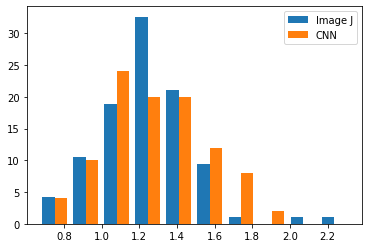

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.04210526, 0.14736842, 0.33684211, 0.66315789, 0.87368421,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.04      , 0.14      , 0.38      , 0.58      , 0.78      ,
         0.9       , 0.98      , 1.        , 1.        , 1.        ]]),
 array([0.66820915, 0.83313215, 0.99805516, 1.16297816, 1.32790116,
        1.49282417, 1.65774717, 1.82267018, 1.98759318, 2.15251619,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

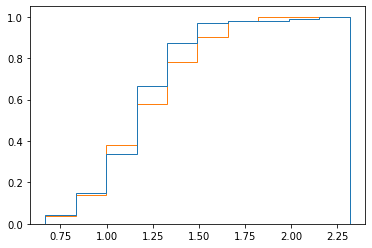

In [ ]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9824644348262345


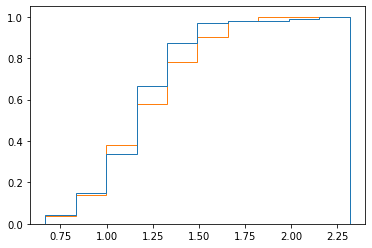

In [ ]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [ ]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [ ]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.982464,0.504373,0.489796,0.693111,0.69338,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.66820915 0.83313215 0.99805516 1.16297816 1.32790116 1.49282417
 1.65774717 1.82267018 1.98759318 2.15251619 2.31743919]
[[ 4.21052632 10.52631579 18.94736842 32.63157895 21.05263158  9.47368421
   1.05263158  0.          1.05263158  1.05263158]
 [ 4.         10.         24.         20.         20.         12.
   8.          2.          0.          0.        ]]


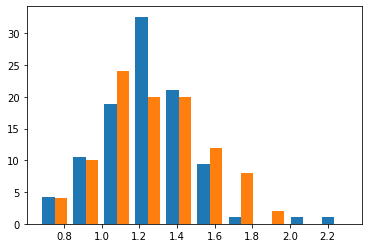

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


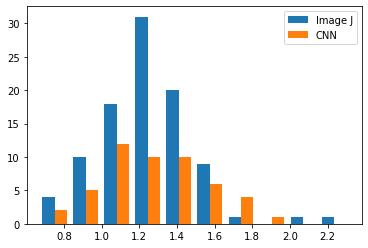

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1